In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

In [2]:
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [3]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data['건당 매출금액'] = data['매출금액']/data['매출건수']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519297 entries, 0 to 519296
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   기준년월        519297 non-null  int64  
 1   품목대분류코드     519297 non-null  int64  
 2   품목대분류명      519297 non-null  object 
 3   품목중분류코드     519297 non-null  int64  
 4   품목중분류명      519297 non-null  object 
 5   성별          519297 non-null  object 
 6   연령          519297 non-null  object 
 7   가구생애주기      519297 non-null  object 
 8   고객소재지_광역시도  519297 non-null  object 
 9   고객소재지_시군구   519297 non-null  object 
 10  고객소재지_읍면동   519297 non-null  object 
 11  매출금액        519297 non-null  int64  
 12  매출건수        519297 non-null  int64  
 13  건당 매출금액     519297 non-null  float64
dtypes: float64(1), int64(5), object(8)
memory usage: 55.5+ MB


In [4]:
data = data.drop(['품목대분류명', '품목중분류명'], axis= 1)


In [5]:
data = data.drop(['기준년월', '품목중분류코드', '고객소재지_읍면동'], axis = 1)

In [6]:
def get_encoding(data, category, target):
    df = pd.DataFrame(data[category])
    for i in range(len(df)):
        if df.iloc[i, 0] == target : df.iloc[i, 0] = 1
        else: df.iloc[i, 0] = 0
    data.drop(category, axis = 1, inplace= True)
    data = data.join(df)
    return data

In [7]:
data = get_encoding(data, '품목대분류코드', 21)
data.head()

,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액,품목대분류코드
0,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13,60193.923077,0
1,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29,33234.103448,1
2,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46,20093.673913,0
3,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54,20173.333333,1
4,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58,28564.482759,0


### e상품서비스를 결제한 사람들의 성별, 연령, 가구, 지역별 분포

여성    55.934098
남성    44.065902
Name: 성별, dtype: float64
40대       28.392416
30대       28.339820
20대       21.280177
50대       12.204807
60대 이상     5.686898
20세 미만     4.095882
Name: 연령, dtype: float64


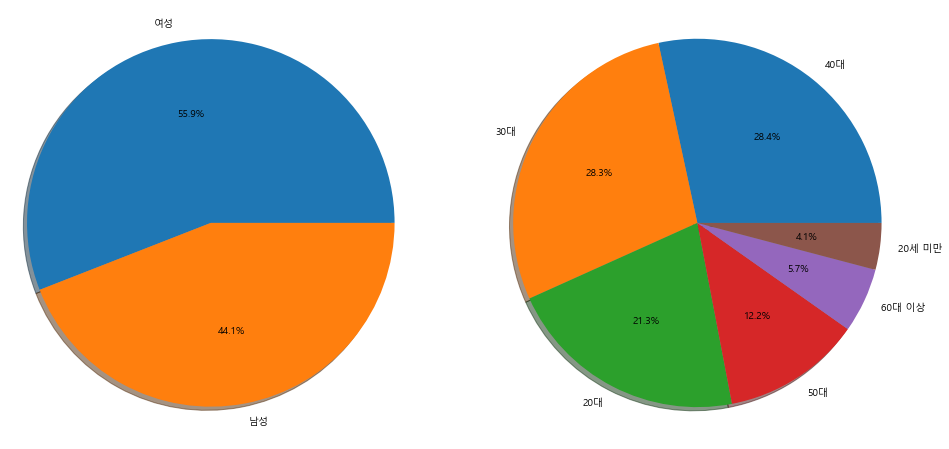

In [8]:
data_f = data[data['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

신혼영유아가구    32.285804
1인가구       28.448956
초중고자녀가구    18.733235
성인자녀가구     14.845106
노인가구        5.686898
Name: 가구생애주기, dtype: float64
서울특별시    58.791353
경기도      27.269500
인천광역시    13.939147
Name: 고객소재지_광역시도, dtype: float64


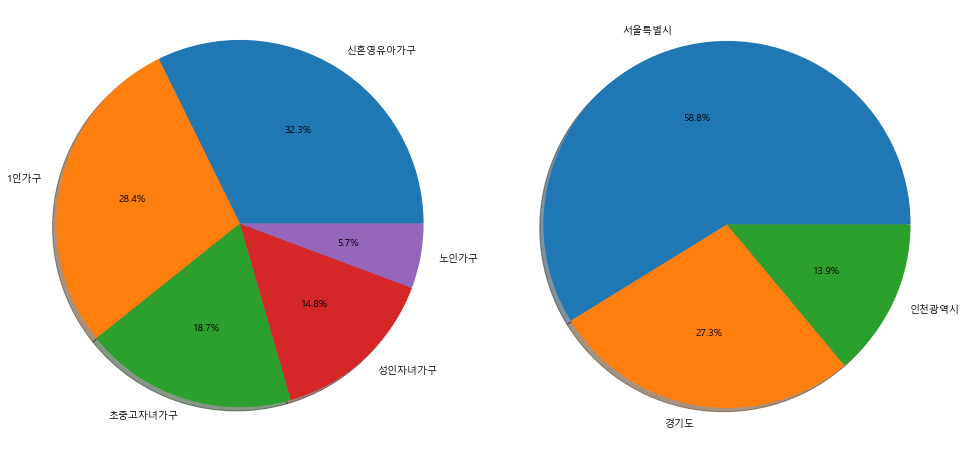

In [9]:
data_f = data[data['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['가구생애주기', '고객소재지_광역시도']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

## 기준년월로 잘라서 모델링하기

#### 201903 기준으로 Classifier

In [10]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data['건당 매출금액'] = data['매출금액']/data['매출건수']
data = data.drop(['품목대분류명', '품목중분류명', '품목중분류코드', '고객소재지_읍면동'], axis= 1)
data_1903 = data[data['기준년월'] == 201903]
data_1903.head()

,기준년월,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액
0,201903,10,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13,60193.923077
1,201903,21,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29,33234.103448
2,201903,19,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46,20093.673913
3,201903,21,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54,20173.333333
4,201903,17,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58,28564.482759


In [11]:
data_1903.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68261 entries, 0 to 71193
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준년월        68261 non-null  int64  
 1   품목대분류코드     68261 non-null  int64  
 2   성별          68261 non-null  object 
 3   연령          68261 non-null  object 
 4   가구생애주기      68261 non-null  object 
 5   고객소재지_광역시도  68261 non-null  object 
 6   고객소재지_시군구   68261 non-null  object 
 7   매출금액        68261 non-null  int64  
 8   매출건수        68261 non-null  int64  
 9   건당 매출금액     68261 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 5.7+ MB


In [12]:
data_1903.describe()

,기준년월,품목대분류코드,매출금액,매출건수,건당 매출금액
count,68261.0,68261.000000,6.826100e+04,68261.000000,6.826100e+04
mean,201903.0,17.516796,2.960863e+06,66.594629,5.119234e+04
std,0.0,10.441012,6.962227e+06,166.780704,6.479536e+04
min,201903.0,10.000000,4.586000e+03,4.000000,4.810769e+02
25%,201903.0,13.000000,6.298530e+05,17.000000,2.621800e+04
50%,201903.0,17.000000,1.261389e+06,29.000000,3.726584e+04
75%,201903.0,20.000000,2.818532e+06,58.000000,5.536074e+04
max,201903.0,99.000000,4.047823e+08,7775.000000,3.427654e+06


매출금액&건수, 건당 매출금액의 분산이 상당히 높음

In [13]:
data_1903 = get_encoding(data_1903, '품목대분류코드', 21)
data_1903.head()

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,기준년월,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액,품목대분류코드
0,201903,여성,40대,초중고자녀가구,서울특별시,구로구,782521,13,60193.923077,0
1,201903,여성,20대,신혼영유아가구,서울특별시,구로구,963789,29,33234.103448,1
2,201903,여성,30대,신혼영유아가구,서울특별시,구로구,924309,46,20093.673913,0
3,201903,여성,30대,신혼영유아가구,서울특별시,구로구,1089360,54,20173.333333,1
4,201903,여성,30대,신혼영유아가구,서울특별시,구로구,1656740,58,28564.482759,0


### 19년 3월 분류

여성    56.582855
남성    43.417145
Name: 성별, dtype: float64
30대       31.201742
40대       30.964166
20대       22.173827
50대       10.621659
60대 이상     4.583251
20세 미만     0.455355
Name: 연령, dtype: float64


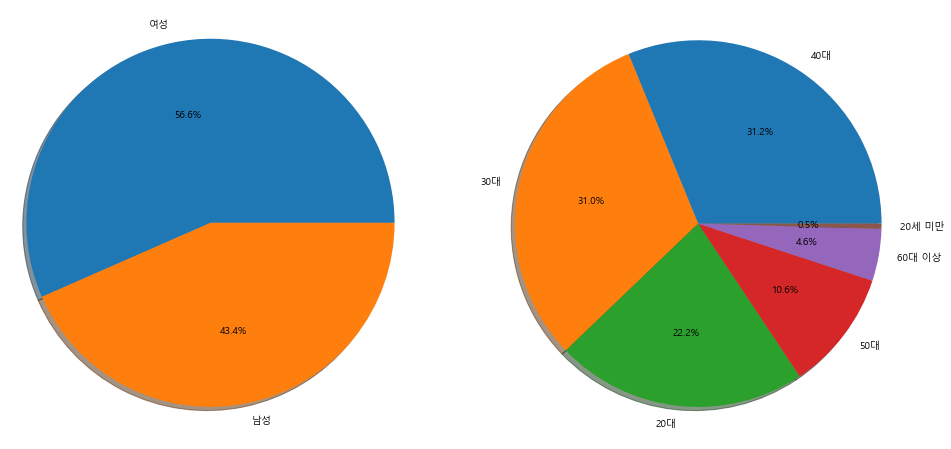

In [14]:
data_f = data_1903[data_1903['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_1903[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

신혼영유아가구    37.091665
1인가구       24.767373
초중고자녀가구    20.144526
성인자녀가구     13.413186
노인가구        4.583251
Name: 가구생애주기, dtype: float64
서울특별시    59.057612
경기도      26.776876
인천광역시    14.165512
Name: 고객소재지_광역시도, dtype: float64


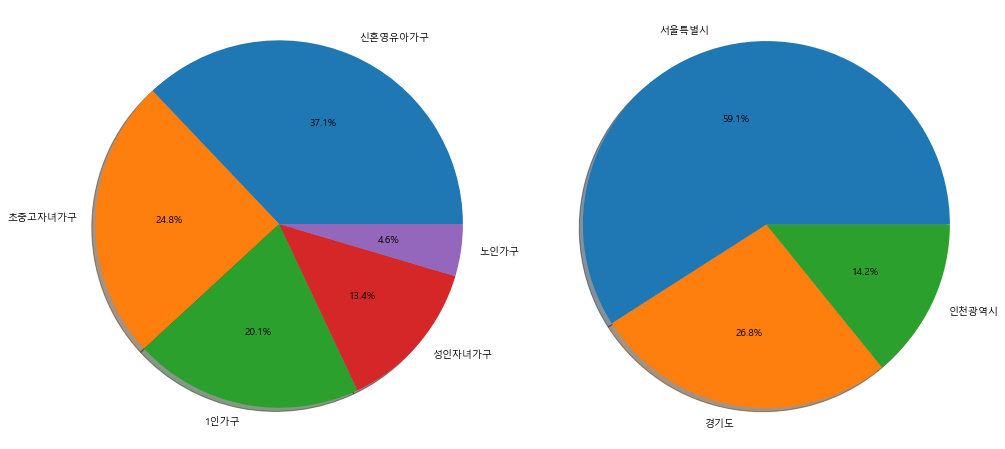

In [15]:
category_list = ['가구생애주기', '고객소재지_광역시도']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_1903[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

0    85.20092
1    14.79908
Name: 품목대분류코드, dtype: float64


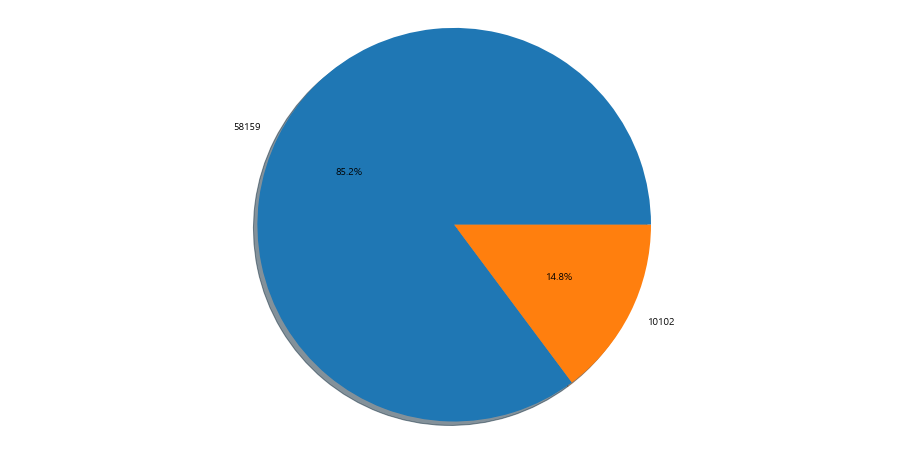

In [16]:
N = len(data_1903)
print(data_1903['품목대분류코드'].value_counts()/N*100)
fig, ax = plt.subplots(figsize = (16, 8))
labels = data_1903['품목대분류코드'].value_counts().unique()
size = data_1903['품목대분류코드'].value_counts()/N*100
ax.pie(size, labels= labels, autopct= '%1.1f%%', shadow=True)
ax.axis('equal')
plt.show() 


레이블의 분포가 불균형 -> SMOTE 기법 적용

In [17]:
def get_dummies(column, df):
    dummies = pd.get_dummies(df[column])
    df.drop(column, axis = 1, inplace = True)
    df = df.join(dummies)
    return df

In [18]:
columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data_1903)

In [19]:
data_dummies.head()

,기준년월,매출금액,매출건수,건당 매출금액,품목대분류코드,강남구,강동구,강북구,강서구,강화군,...,양천구,연수구,영등포구,옹진군,용산구,용인시,은평구,종로구,중구,중랑구
0,201903,782521,13,60193.923077,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,201903,963789,29,33234.103448,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,201903,924309,46,20093.673913,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,201903,1089360,54,20173.333333,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,201903,1656740,58,28564.482759,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [21]:
def get_preprocessed_df(df, category):
    df_copy = df.copy()
    scaled = np.log1p(df_copy[category])
    df_copy.insert(0, category + '_Scaled', scaled)
    df_copy.drop(category, axis = 1, inplace = True)
    return df_copy

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='매출금액_Scaled', ylabel='Density'>

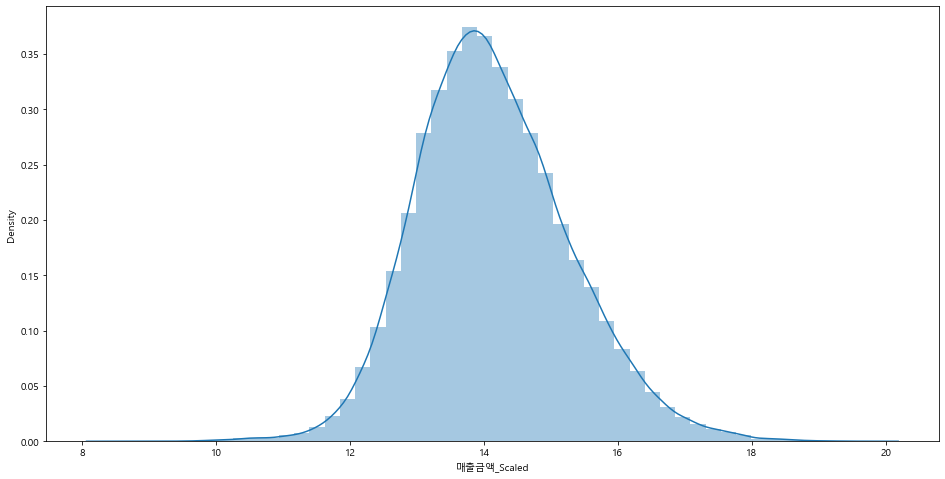

In [22]:
data_dummies = get_preprocessed_df(data_dummies, '매출금액')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출금액_Scaled'])

<AxesSubplot:xlabel='매출건수_Scaled', ylabel='Density'>

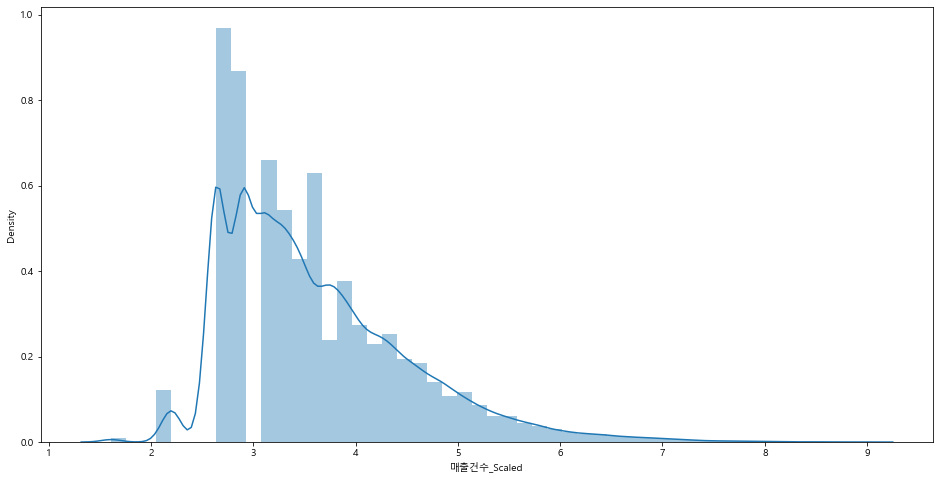

In [23]:
data_dummies = get_preprocessed_df(data_dummies, '매출건수')

import warnings
warnings.filterwarnings('ignore')

fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['매출건수_Scaled'])

<AxesSubplot:xlabel='건당 매출금액_Scaled', ylabel='Density'>

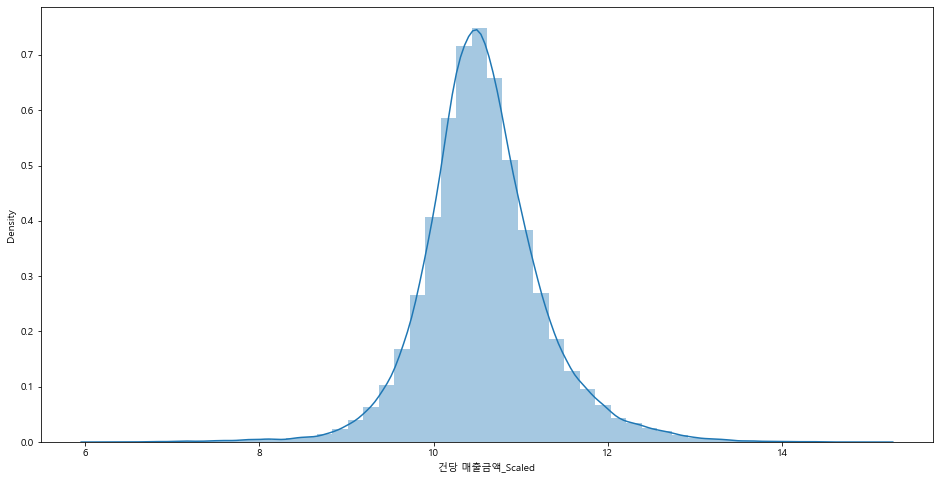

In [24]:
data_dummies = get_preprocessed_df(data_dummies, '건당 매출금액')


fig, ax = plt.subplots(1, 1, figsize = (16, 8))
sns.distplot(data_dummies['건당 매출금액_Scaled'])

In [25]:
df_M_and_C = data_dummies[['매출금액_Scaled','매출건수_Scaled', '건당 매출금액_Scaled']]

target = data_dummies['품목대분류코드']
feature = df_M_and_C

(array([0, 1, 2]),
 [Text(0, 0, '매출금액_Scaled'),
  Text(1, 0, '매출건수_Scaled'),
  Text(2, 0, '건당 매출금액_Scaled')])

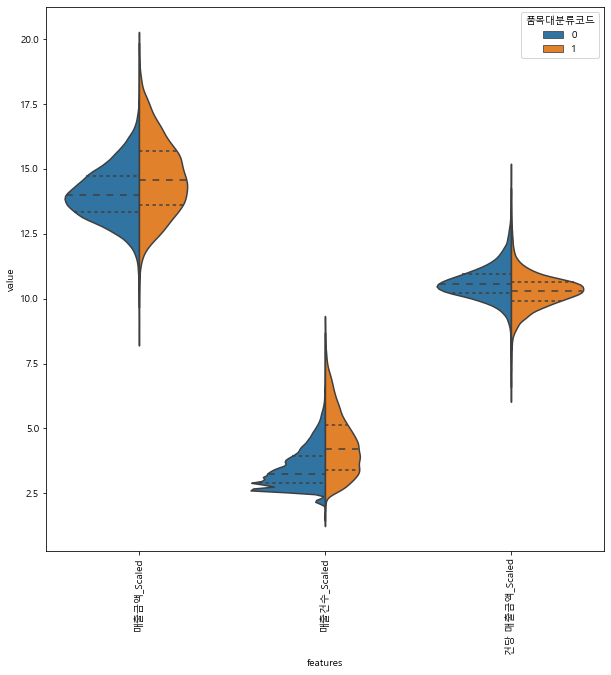

In [26]:
data_mel = pd.concat([target, feature], axis = 1)
data_mel = pd.melt(data_mel, id_vars= '품목대분류코드', var_name= 'features', value_name= 'value')
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
sns.violinplot(x = 'features', y = 'value', hue = '품목대분류코드', data = data_mel, split = True, inner = 'quart')
plt.xticks(rotation= 90)

In [27]:
#평가함수
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    #ROC-AUC 추가
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    #ROC-AUC print추가
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

#모델적용평가함수
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train = None, tgt_test = None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [28]:

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()
xgb_clf = XGBClassifier(n_estimators = 500)
gb_clf = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

clf_list = [dt_clf, rf_clf, lr_clf, xgb_clf, gb_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train, ftr_test=X_test, tgt_train=y_train, tgt_test = y_test)

오차 행렬
[[10320  1312]
 [ 1285   736]]
정확도 : 0.8098, 정밀도 : 0.3594, 재현율 : 0.3642, F1 : 0.3618, AUC : 0.6258
오차 행렬
[[10914   718]
 [ 1348   673]]
정확도 : 0.8487, 정밀도 : 0.4838, 재현율 : 0.3330, F1 : 0.3945, AUC : 0.7595
오차 행렬
[[11632     0]
 [ 2021     0]]
정확도 : 0.8520, 정밀도 : 0.0000, 재현율 : 0.0000, F1 : 0.0000, AUC : 0.4637
[19:30:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[11281   351]
 [ 1437   584]]
정확도 : 0.8690, 정밀도 : 0.6246, 재현율 : 0.2890, F1 : 0.3951, AUC : 0.7745
오차 행렬
[[11421   211]
 [ 1473   548]]
정확도 : 0.8767, 정밀도 : 0.7220, 재현율 : 0.2712, F1 : 0.3942, AUC : 0.8009


In [29]:
ftr_importances = pd.Series(dt_clf.feature_importances_, index = X_features.columns)

ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
ftr_bottom20 = ftr_importances.sort_values(ascending=True)[:20]

Feature importance:\건당 매출금액_Scaled    0.324
매출금액_Scaled       0.275
매출건수_Scaled       0.199
수원시               0.010
고양시               0.010
성남시               0.009
용인시               0.008
송파구               0.007
마포구               0.007
중랑구               0.007
강남구               0.006
종로구               0.006
은평구               0.006
서구                0.006
영등포구              0.006
용산구               0.006
강서구               0.006
구로구               0.006
관악구               0.006
성북구               0.005
dtype: float64


<AxesSubplot:>

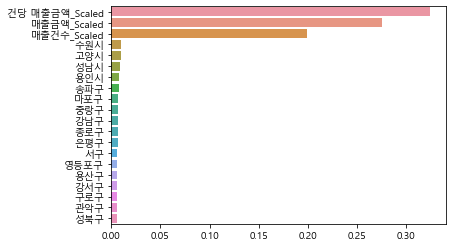

In [30]:
#feature importance 추출
print("Feature importance:\{0}".format(np.round(ftr_top20, 3)))

#feature importance를 column 별로 시각화하기
fig, ax = plt.subplots()
sns.barplot(x = ftr_top20, y = ftr_top20.index) 

In [31]:
warnings.filterwarnings('ignore')

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

xgb_clf = XGBClassifier()
gb_clf = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.2, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

clf_list = [xgb_clf, gb_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

[19:31:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[10446  1186]
 [ 1036   985]]
정확도 : 0.8373, 정밀도 : 0.4537, 재현율 : 0.4874, F1 : 0.4699, AUC : 0.7885
오차 행렬
[[9065 2567]
 [ 661 1360]]
정확도 : 0.7636, 정밀도 : 0.3463, 재현율 : 0.6729, F1 : 0.4573, AUC : 0.7994


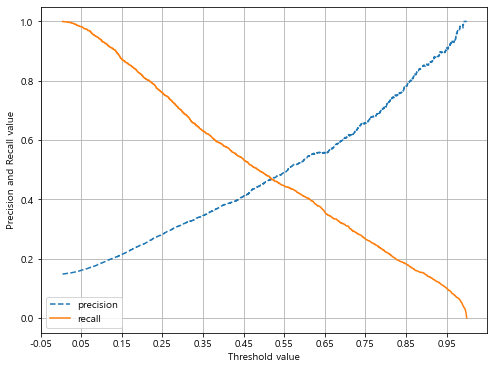

In [32]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    #threshold ndarray와 threshold에 따른 정밀도, 재현율 ndarray 추출.
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    #X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8, 6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label = 'recall')

    #threshold 값 X축의 Scale을 0.1 단위로 변경 
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    #x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel("Threshold value"); plt.ylabel("Precision and Recall value")
    plt.legend(); plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, xgb_clf.predict_proba(X_test)[:, 1])

In [33]:
xgb_clf = XGBClassifier(n_estimators = 500,colsample_bytree = 0.5, sub_sample = 0.5, reg_alpha = 0, min_child_weight = 5, learing_rate = 0.05)

params = {
    'max_depth' : [27, 29]
}

grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv = 3, verbose= 1, n_jobs= -1)
grid_cv.fit(X_train_over, y_train_over, early_stopping_rounds = 80, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[19:33:00] WARNING: ..\src\learner.cc:541: 
Parameters: { learing_rate, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.70728	validation_1-auc:0.59870
[1]	validation_0-auc:0.92573	validation_1-auc:0.73747
[2]	validation_0-auc:0.93773	validation_1-auc:0.74951
[3]	validation_0-auc:0.93886	validation_1-auc:0.75306
[4]	validation_0-auc:0.94145	validation_1-auc:0.76400
[5]	validation_0-auc:0.94918	validation_1-auc:0.77095
[6]	validation_0-auc:0.94954	validation_1-auc:0.77170
[7]	validation_0-auc:0.94824	validation_1-auc:0.77236
[8]	validation_0-auc:0.94844	validation_1-auc:0.77297
[9]	validation_0-auc:0.95257	validation_1-auc:0.77312
[10]	validation_0-auc:0.95587	validation_1-auc:0.77098
[1

In [34]:
xgb_clf = XGBClassifier(n_estimators = 500,colsample_bytree = 0.5, sub_sample = 0.5, reg_alpha = 0, min_child_weight = 5, learing_rate = 0.05)

params = {
    'max_depth' : [23, 25, 27]
}

grid_cv = GridSearchCV(xgb_clf, param_grid=params, cv = 3, verbose= 1, n_jobs= -1)
grid_cv.fit(X_train_over, y_train_over, early_stopping_rounds = 80, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[19:34:52] WARNING: ..\src\learner.cc:541: 
Parameters: { learing_rate, sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-auc:0.70297	validation_1-auc:0.59950
[1]	validation_0-auc:0.92425	validation_1-auc:0.74024
[2]	validation_0-auc:0.93568	validation_1-auc:0.75114
[3]	validation_0-auc:0.93681	validation_1-auc:0.75483
[4]	validation_0-auc:0.93876	validation_1-auc:0.76473
[5]	validation_0-auc:0.94683	validation_1-auc:0.77136
[6]	validation_0-auc:0.94721	validation_1-auc:0.77213
[7]	validation_0-auc:0.94593	validation_1-auc:0.77260
[8]	validation_0-auc:0.94614	validation_1-auc:0.77316
[9]	validation_0-auc:0.95102	validation_1-auc:0.77337
[10]	validation_0-auc:0.95438	validation_1-auc:0.77152
[1

In [35]:
xgb_clf = XGBClassifier(n_estimators = 500,colsample_bytree = 0.5, reg_alpha = 0, min_child_weight = 5, max_depth = 27)

xgb_clf.fit(X_train_over, y_train_over, early_stopping_rounds= 100, eval_metric = 'auc', eval_set = [(X_train_over, y_train_over), (X_test, y_test)])
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, xgb_pred, xgb_pred_proba)

[0]	validation_0-auc:0.70297	validation_1-auc:0.59950
[1]	validation_0-auc:0.92425	validation_1-auc:0.74024
[2]	validation_0-auc:0.93568	validation_1-auc:0.75114
[3]	validation_0-auc:0.93681	validation_1-auc:0.75483
[4]	validation_0-auc:0.93876	validation_1-auc:0.76473
[5]	validation_0-auc:0.94683	validation_1-auc:0.77136
[6]	validation_0-auc:0.94721	validation_1-auc:0.77213
[7]	validation_0-auc:0.94593	validation_1-auc:0.77260
[8]	validation_0-auc:0.94614	validation_1-auc:0.77316
[9]	validation_0-auc:0.95102	validation_1-auc:0.77337
[10]	validation_0-auc:0.95438	validation_1-auc:0.77152
[11]	validation_0-auc:0.95749	validation_1-auc:0.77088
[12]	validation_0-auc:0.95930	validation_1-auc:0.76910
[13]	validation_0-auc:0.96107	validation_1-auc:0.76877
[14]	validation_0-auc:0.96286	validation_1-auc:0.76816
[15]	validation_0-auc:0.96446	validation_1-auc:0.76799
[16]	validation_0-auc:0.96680	validation_1-auc:0.76756
[17]	validation_0-auc:0.96789	validation_1-auc:0.76638
[18]	validation_0-au

In [36]:
def get_outlier_0(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 0][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

def get_outlier_1(df = None, column = None, weight = 1.5, target = None):
    fraud = df[df[target] == 1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)

    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight

    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index    

### 19년 9월 분류

In [37]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data['건당 매출금액'] = data['매출금액']/data['매출건수']
data = data.drop(['품목대분류명', '품목중분류명', '품목중분류코드', '고객소재지_읍면동'], axis= 1)
data_1909 = data[data['기준년월'] == 201909]
data_1909.head()

,기준년월,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액
66588,201909,16,여성,20대,신혼영유아가구,서울특별시,강동구,401631,9,44625.666667
66590,201909,11,여성,30대,신혼영유아가구,서울특별시,광진구,1688549,17,99326.411765
66591,201909,20,여성,40대,초중고자녀가구,서울특별시,광진구,2128596,19,112031.368421
66592,201909,16,여성,30대,1인가구,서울특별시,광진구,95919,5,19183.800000
66598,201909,11,여성,40대,신혼영유아가구,서울특별시,양천구,2621338,12,218444.833333


In [38]:
data_1909.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109747 entries, 66588 to 179356
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   기준년월        109747 non-null  int64  
 1   품목대분류코드     109747 non-null  int64  
 2   성별          109747 non-null  object 
 3   연령          109747 non-null  object 
 4   가구생애주기      109747 non-null  object 
 5   고객소재지_광역시도  109747 non-null  object 
 6   고객소재지_시군구   109747 non-null  object 
 7   매출금액        109747 non-null  int64  
 8   매출건수        109747 non-null  int64  
 9   건당 매출금액     109747 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 9.2+ MB


In [39]:
data_1909.describe()

,기준년월,품목대분류코드,매출금액,매출건수,건당 매출금액
count,109747.0,109747.000000,1.097470e+05,109747.000000,1.097470e+05
mean,201909.0,18.155111,1.757564e+06,37.508852,5.472235e+04
std,0.0,12.919216,5.004613e+06,123.909636,6.349017e+04
min,201909.0,10.000000,2.585000e+03,5.000000,4.575556e+02
25%,201909.0,13.000000,2.952360e+05,7.000000,2.809871e+04
50%,201909.0,17.000000,6.304800e+05,14.000000,4.045260e+04
75%,201909.0,20.000000,1.523278e+06,29.000000,6.101604e+04
max,201909.0,99.000000,3.147732e+08,8586.000000,3.080221e+06


In [40]:
data_1909 = get_encoding(data_1909, '품목대분류코드', 21)
data_1909.head()

,기준년월,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액,품목대분류코드
66588,201909,여성,20대,신혼영유아가구,서울특별시,강동구,401631,9,44625.666667,0
66590,201909,여성,30대,신혼영유아가구,서울특별시,광진구,1688549,17,99326.411765,0
66591,201909,여성,40대,초중고자녀가구,서울특별시,광진구,2128596,19,112031.368421,0
66592,201909,여성,30대,1인가구,서울특별시,광진구,95919,5,19183.800000,0
66598,201909,여성,40대,신혼영유아가구,서울특별시,양천구,2621338,12,218444.833333,0


여성    56.275304
남성    43.724696
Name: 성별, dtype: float64
30대       28.178138
40대       27.237621
20대       23.836811
50대       10.787917
20세 미만     5.107443
60대 이상     4.852071
Name: 연령, dtype: float64


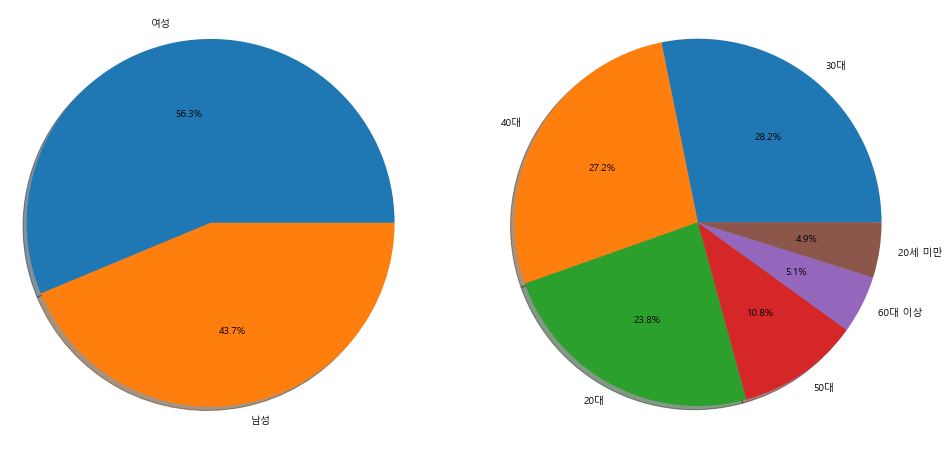

In [41]:
data_f = data_1909[data_1909['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_1909[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

신혼영유아가구    33.553410
1인가구       30.208658
초중고자녀가구    17.477421
성인자녀가구     13.908440
노인가구        4.852071
Name: 가구생애주기, dtype: float64
서울특별시    58.966054
경기도      27.318592
인천광역시    13.715353
Name: 고객소재지_광역시도, dtype: float64


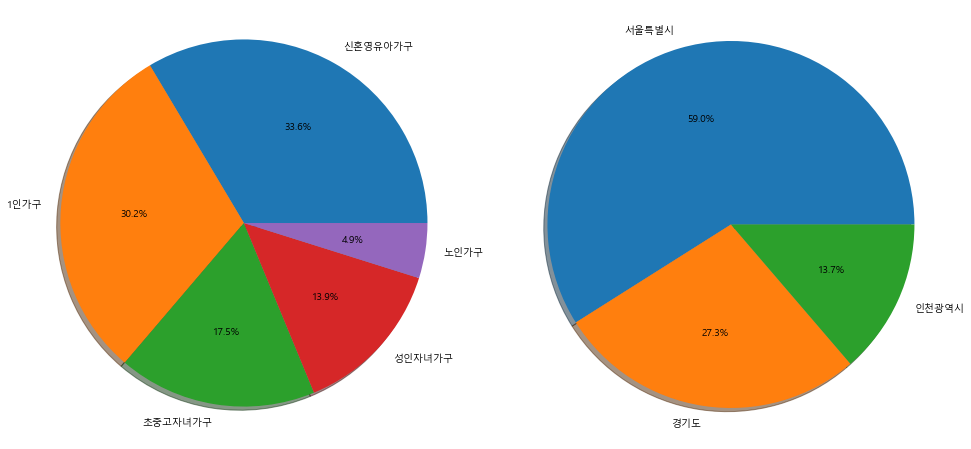

In [42]:
category_list = ['가구생애주기', '고객소재지_광역시도']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_1909[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

0    85.370899
1    14.629101
Name: 품목대분류코드, dtype: float64


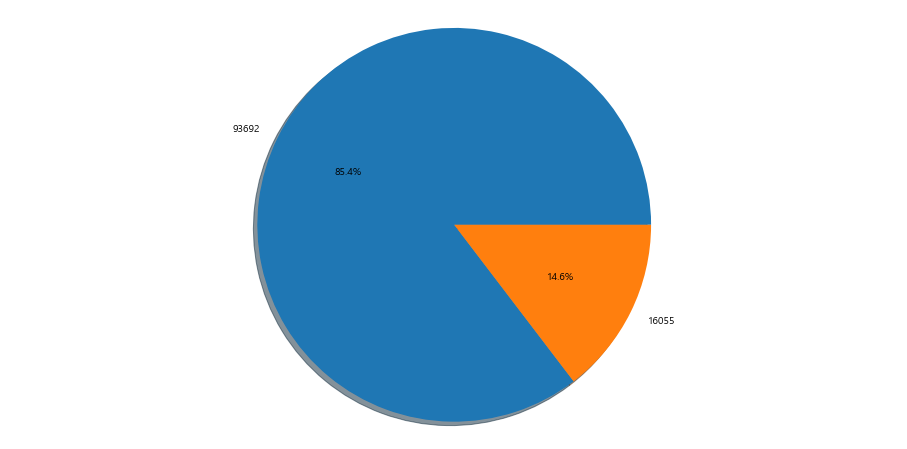

In [43]:
N = len(data_1909)
print(data_1909['품목대분류코드'].value_counts()/N*100)
fig, ax = plt.subplots(figsize = (16, 8))
labels = data_1909['품목대분류코드'].value_counts().unique()
size = data_1909['품목대분류코드'].value_counts()/N*100
ax.pie(size, labels= labels, autopct= '%1.1f%%', shadow=True)
ax.axis('equal')
plt.show() 

In [44]:
columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data_1909)

In [45]:
data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
data_dummies = get_preprocessed_df(data_dummies, '건당 매출금액')

In [46]:
warnings.filterwarnings('ignore')

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

xgb_clf = XGBClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

clf_list = [xgb_clf, rf_clf, gb_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

[19:36:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[24676  3432]
 [ 2234  2583]]
정확도 : 0.8279, 정밀도 : 0.4294, 재현율 : 0.5362, F1 : 0.4769, AUC : 0.7922
오차 행렬
[[22953  5155]
 [ 2349  2468]]
정확도 : 0.7721, 정밀도 : 0.3238, 재현율 : 0.5124, F1 : 0.3968, AUC : 0.7457
오차 행렬
[[22049  6059]
 [ 1598  3219]]
정확도 : 0.7674, 정밀도 : 0.3469, 재현율 : 0.6683, F1 : 0.4568, AUC : 0.8016


### 20년 3월 분류

In [47]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data['건당 매출금액'] = data['매출금액']/data['매출건수']
data = data.drop(['품목대분류명', '품목중분류명', '품목중분류코드', '고객소재지_읍면동'], axis= 1)
data_2003 = data[data['기준년월'] == 202003]
data_2003.head()

,기준년월,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액
177298,202003,20,남성,20대,1인가구,서울특별시,구로구,201000,5,40200.000000
177304,202003,13,여성,50대,성인자녀가구,서울특별시,강동구,366020,5,73204.000000
177305,202003,20,남성,30대,신혼영유아가구,서울특별시,강동구,396400,4,99100.000000
177306,202003,20,여성,20대,1인가구,서울특별시,강동구,4934890,75,65798.533333
177307,202003,15,남성,20대,신혼영유아가구,서울특별시,강동구,85200,4,21300.000000


In [48]:
data_2003.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135706 entries, 177298 to 314216
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   기준년월        135706 non-null  int64  
 1   품목대분류코드     135706 non-null  int64  
 2   성별          135706 non-null  object 
 3   연령          135706 non-null  object 
 4   가구생애주기      135706 non-null  object 
 5   고객소재지_광역시도  135706 non-null  object 
 6   고객소재지_시군구   135706 non-null  object 
 7   매출금액        135706 non-null  int64  
 8   매출건수        135706 non-null  int64  
 9   건당 매출금액     135706 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 11.4+ MB


In [49]:
data_2003.describe()

,기준년월,품목대분류코드,매출금액,매출건수,건당 매출금액
count,135706.0,135706.000000,1.357060e+05,135706.000000,1.357060e+05
mean,202003.0,18.300569,1.697384e+06,39.454195,5.315718e+04
std,0.0,13.661495,5.723973e+06,157.751615,6.366754e+04
min,202003.0,10.000000,1.490000e+03,4.000000,2.483333e+02
25%,202003.0,13.000000,2.472225e+05,6.000000,2.890137e+04
50%,202003.0,16.000000,5.388560e+05,11.000000,4.005941e+04
75%,202003.0,20.000000,1.347922e+06,27.000000,5.859117e+04
max,202003.0,99.000000,3.073579e+08,11811.000000,6.273938e+06


In [50]:
data_2003 = get_encoding(data_2003, '품목대분류코드', 21)
data_2003.head()

,기준년월,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액,품목대분류코드
177298,202003,남성,20대,1인가구,서울특별시,구로구,201000,5,40200.000000,0
177304,202003,여성,50대,성인자녀가구,서울특별시,강동구,366020,5,73204.000000,0
177305,202003,남성,30대,신혼영유아가구,서울특별시,강동구,396400,4,99100.000000,0
177306,202003,여성,20대,1인가구,서울특별시,강동구,4934890,75,65798.533333,0
177307,202003,남성,20대,신혼영유아가구,서울특별시,강동구,85200,4,21300.000000,0


여성    55.87198
남성    44.12802
Name: 성별, dtype: float64
30대       28.072854
40대       27.388535
20대       21.903458
50대       11.675528
60대 이상     5.611412
20세 미만     5.348213
Name: 연령, dtype: float64


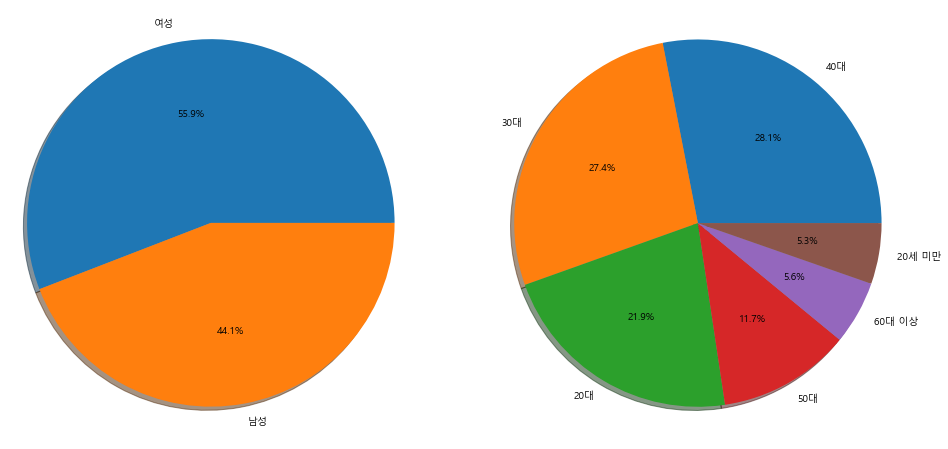

In [51]:
data_f = data_2003[data_2003['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_2003[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

신혼영유아가구    31.562878
1인가구       29.636258
초중고자녀가구    17.913355
성인자녀가구     15.276096
노인가구        5.611412
Name: 가구생애주기, dtype: float64
서울특별시    58.804022
경기도      27.309575
인천광역시    13.886403
Name: 고객소재지_광역시도, dtype: float64


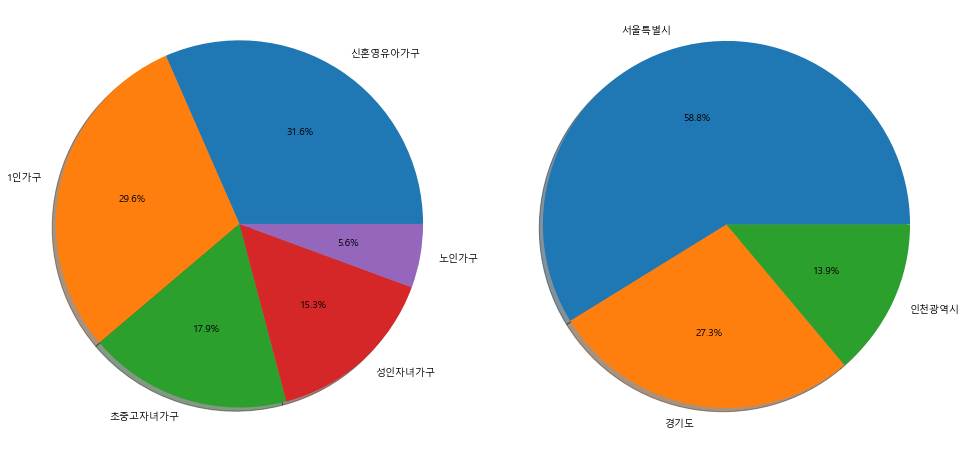

In [52]:
category_list = ['가구생애주기', '고객소재지_광역시도']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_2003[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

0    86.001356
1    13.998644
Name: 품목대분류코드, dtype: float64


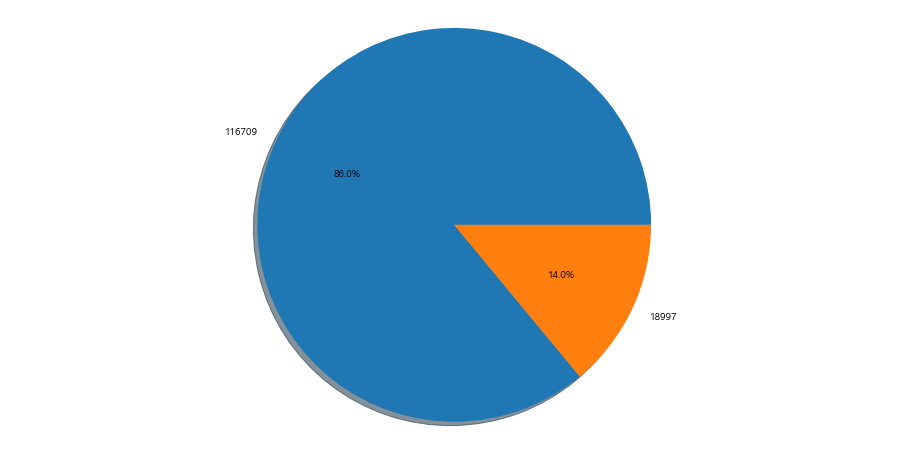

In [53]:
N = len(data_2003)
print(data_2003['품목대분류코드'].value_counts()/N*100)
fig, ax = plt.subplots(figsize = (16, 8))
labels = data_2003['품목대분류코드'].value_counts().unique()
size = data_2003['품목대분류코드'].value_counts()/N*100
ax.pie(size, labels= labels, autopct= '%1.1f%%', shadow=True)
ax.axis('equal')
plt.show() 

In [54]:
columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data_2003)

In [55]:
data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
data_dummies = get_preprocessed_df(data_dummies, '건당 매출금액')

In [56]:
warnings.filterwarnings('ignore')

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

xgb_clf = XGBClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

clf_list = [xgb_clf, rf_clf, gb_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

[19:38:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[30371  4642]
 [ 2445  3254]]
정확도 : 0.8259, 정밀도 : 0.4121, 재현율 : 0.5710, F1 : 0.4787, AUC : 0.8044
오차 행렬
[[28996  6017]
 [ 2755  2944]]
정확도 : 0.7845, 정밀도 : 0.3285, 재현율 : 0.5166, F1 : 0.4016, AUC : 0.7516
오차 행렬
[[27757  7256]
 [ 1783  3916]]
정확도 : 0.7780, 정밀도 : 0.3505, 재현율 : 0.6871, F1 : 0.4642, AUC : 0.8128


### 20년 9월 분류

In [57]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data['건당 매출금액'] = data['매출금액']/data['매출건수']
data = data.drop(['품목대분류명', '품목중분류명', '품목중분류코드', '고객소재지_읍면동'], axis= 1)
data_2003 = data[data['기준년월'] == 202003]
data_2003.head()

,기준년월,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액
177298,202003,20,남성,20대,1인가구,서울특별시,구로구,201000,5,40200.000000
177304,202003,13,여성,50대,성인자녀가구,서울특별시,강동구,366020,5,73204.000000
177305,202003,20,남성,30대,신혼영유아가구,서울특별시,강동구,396400,4,99100.000000
177306,202003,20,여성,20대,1인가구,서울특별시,강동구,4934890,75,65798.533333
177307,202003,15,남성,20대,신혼영유아가구,서울특별시,강동구,85200,4,21300.000000


In [58]:
data_2003.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135706 entries, 177298 to 314216
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   기준년월        135706 non-null  int64  
 1   품목대분류코드     135706 non-null  int64  
 2   성별          135706 non-null  object 
 3   연령          135706 non-null  object 
 4   가구생애주기      135706 non-null  object 
 5   고객소재지_광역시도  135706 non-null  object 
 6   고객소재지_시군구   135706 non-null  object 
 7   매출금액        135706 non-null  int64  
 8   매출건수        135706 non-null  int64  
 9   건당 매출금액     135706 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 11.4+ MB


In [59]:
data_2003.describe()

,기준년월,품목대분류코드,매출금액,매출건수,건당 매출금액
count,135706.0,135706.000000,1.357060e+05,135706.000000,1.357060e+05
mean,202003.0,18.300569,1.697384e+06,39.454195,5.315718e+04
std,0.0,13.661495,5.723973e+06,157.751615,6.366754e+04
min,202003.0,10.000000,1.490000e+03,4.000000,2.483333e+02
25%,202003.0,13.000000,2.472225e+05,6.000000,2.890137e+04
50%,202003.0,16.000000,5.388560e+05,11.000000,4.005941e+04
75%,202003.0,20.000000,1.347922e+06,27.000000,5.859117e+04
max,202003.0,99.000000,3.073579e+08,11811.000000,6.273938e+06


In [60]:
data_2003 = get_encoding(data_2003, '품목대분류코드', 21)
data_2003.head()

,기준년월,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액,품목대분류코드
177298,202003,남성,20대,1인가구,서울특별시,구로구,201000,5,40200.000000,0
177304,202003,여성,50대,성인자녀가구,서울특별시,강동구,366020,5,73204.000000,0
177305,202003,남성,30대,신혼영유아가구,서울특별시,강동구,396400,4,99100.000000,0
177306,202003,여성,20대,1인가구,서울특별시,강동구,4934890,75,65798.533333,0
177307,202003,남성,20대,신혼영유아가구,서울특별시,강동구,85200,4,21300.000000,0


여성    55.87198
남성    44.12802
Name: 성별, dtype: float64
30대       28.072854
40대       27.388535
20대       21.903458
50대       11.675528
60대 이상     5.611412
20세 미만     5.348213
Name: 연령, dtype: float64


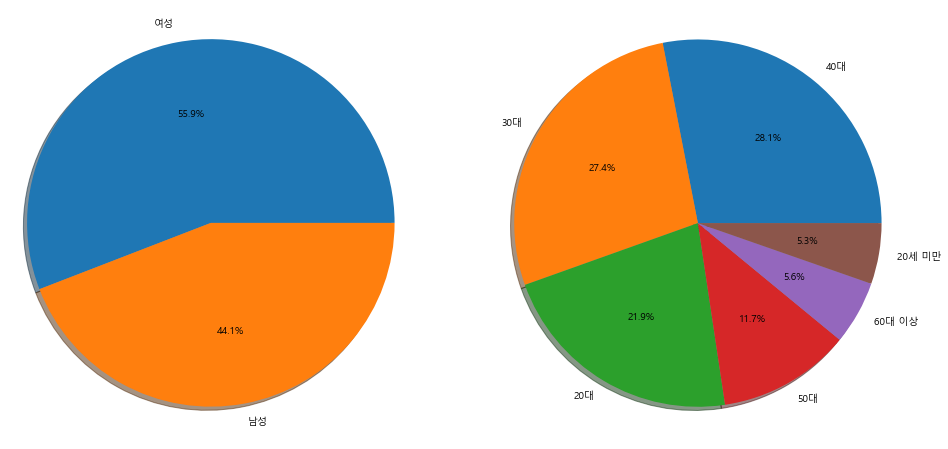

In [61]:
data_f = data_2003[data_2003['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_2003[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

신혼영유아가구    31.562878
1인가구       29.636258
초중고자녀가구    17.913355
성인자녀가구     15.276096
노인가구        5.611412
Name: 가구생애주기, dtype: float64
서울특별시    58.804022
경기도      27.309575
인천광역시    13.886403
Name: 고객소재지_광역시도, dtype: float64


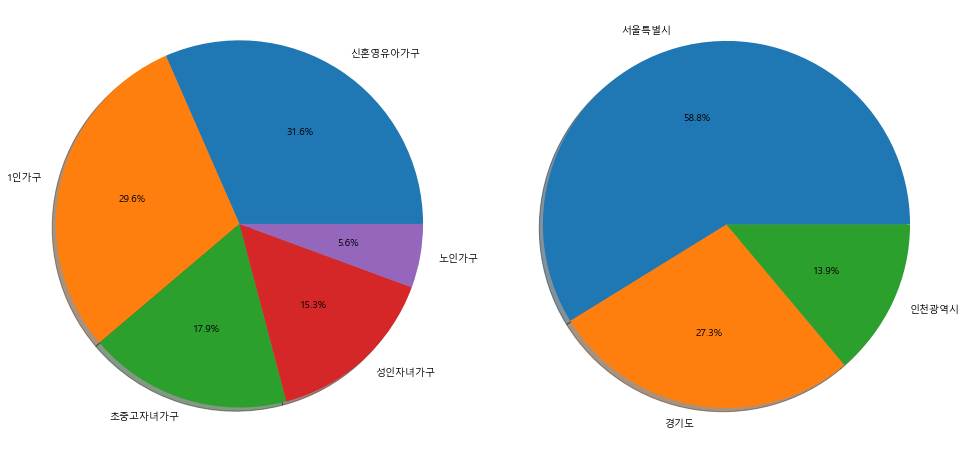

In [62]:
category_list = ['가구생애주기', '고객소재지_광역시도']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_2003[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

0    86.001356
1    13.998644
Name: 품목대분류코드, dtype: float64


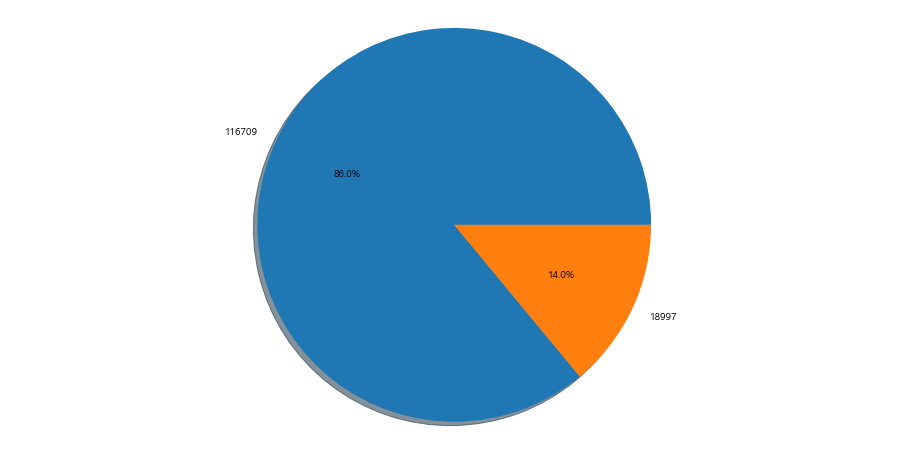

In [63]:
N = len(data_2003)
print(data_2003['품목대분류코드'].value_counts()/N*100)
fig, ax = plt.subplots(figsize = (16, 8))
labels = data_2003['품목대분류코드'].value_counts().unique()
size = data_2003['품목대분류코드'].value_counts()/N*100
ax.pie(size, labels= labels, autopct= '%1.1f%%', shadow=True)
ax.axis('equal')
plt.show() 

In [64]:
columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data_2003)

In [65]:
data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
data_dummies = get_preprocessed_df(data_dummies, '건당 매출금액')

In [66]:
warnings.filterwarnings('ignore')

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

xgb_clf = XGBClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

clf_list = [xgb_clf, rf_clf, gb_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

[19:40:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[30556  4457]
 [ 2452  3247]]
정확도 : 0.8303, 정밀도 : 0.4215, 재현율 : 0.5697, F1 : 0.4845, AUC : 0.8080
오차 행렬
[[28928  6085]
 [ 2682  3017]]
정확도 : 0.7847, 정밀도 : 0.3315, 재현율 : 0.5294, F1 : 0.4077, AUC : 0.7610
오차 행렬
[[27437  7576]
 [ 1730  3969]]
정확도 : 0.7714, 정밀도 : 0.3438, 재현율 : 0.6964, F1 : 0.4603, AUC : 0.8142


### 20년 9월 분류

In [67]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data['건당 매출금액'] = data['매출금액']/data['매출건수']
data = data.drop(['품목대분류명', '품목중분류명', '품목중분류코드', '고객소재지_읍면동'], axis= 1)
data_2009 = data[data['기준년월'] == 202009]
data_2009.head()

,기준년월,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액
312444,202009,20,남성,50대,성인자녀가구,서울특별시,강동구,4204543,85,49465.211765
312455,202009,11,여성,40대,초중고자녀가구,서울특별시,양천구,7081463,72,98353.652778
312456,202009,11,여성,40대,초중고자녀가구,서울특별시,양천구,3520400,72,48894.444444
312462,202009,16,여성,30대,신혼영유아가구,서울특별시,강북구,1998274,89,22452.516854
312466,202009,16,여성,30대,신혼영유아가구,서울특별시,동작구,305109,14,21793.500000


In [68]:
data_2009.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76858 entries, 312444 to 398837
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   기준년월        76858 non-null  int64  
 1   품목대분류코드     76858 non-null  int64  
 2   성별          76858 non-null  object 
 3   연령          76858 non-null  object 
 4   가구생애주기      76858 non-null  object 
 5   고객소재지_광역시도  76858 non-null  object 
 6   고객소재지_시군구   76858 non-null  object 
 7   매출금액        76858 non-null  int64  
 8   매출건수        76858 non-null  int64  
 9   건당 매출금액     76858 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 6.5+ MB


In [69]:
data_2003.describe()

,기준년월,매출금액,매출건수,건당 매출금액,품목대분류코드
count,135706.0,1.357060e+05,135706.000000,1.357060e+05,135706.000000
mean,202003.0,1.697384e+06,39.454195,5.315718e+04,0.139986
std,0.0,5.723973e+06,157.751615,6.366754e+04,0.346974
min,202003.0,1.490000e+03,4.000000,2.483333e+02,0.000000
25%,202003.0,2.472225e+05,6.000000,2.890137e+04,0.000000
50%,202003.0,5.388560e+05,11.000000,4.005941e+04,0.000000
75%,202003.0,1.347922e+06,27.000000,5.859117e+04,0.000000
max,202003.0,3.073579e+08,11811.000000,6.273938e+06,1.000000


In [70]:
data_2009 = get_encoding(data_2009, '품목대분류코드', 21)
data_2009.head()

,기준년월,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액,품목대분류코드
312444,202009,남성,50대,성인자녀가구,서울특별시,강동구,4204543,85,49465.211765,0
312455,202009,여성,40대,초중고자녀가구,서울특별시,양천구,7081463,72,98353.652778,0
312456,202009,여성,40대,초중고자녀가구,서울특별시,양천구,3520400,72,48894.444444,0
312462,202009,여성,30대,신혼영유아가구,서울특별시,강북구,1998274,89,22452.516854,0
312466,202009,여성,30대,신혼영유아가구,서울특별시,동작구,305109,14,21793.500000,0


여성    55.690465
남성    44.309535
Name: 성별, dtype: float64
40대       29.350818
30대       26.355836
20대       20.568237
50대       13.574551
60대 이상     6.734661
20세 미만     3.415898
Name: 연령, dtype: float64


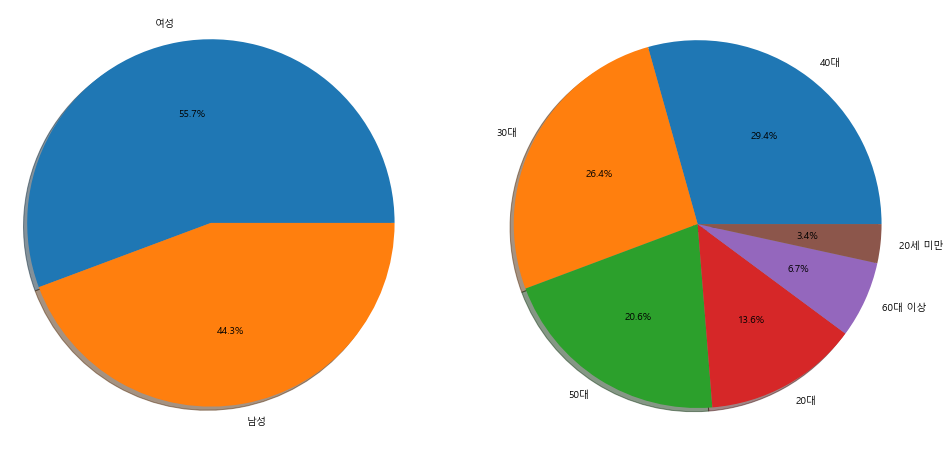

In [71]:
data_f = data_2009[data_2009['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_2009[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

신혼영유아가구    30.767363
1인가구       26.129189
초중고자녀가구    19.345961
성인자녀가구     17.022827
노인가구        6.734661
Name: 가구생애주기, dtype: float64
서울특별시    58.944471
경기도      26.987211
인천광역시    14.068318
Name: 고객소재지_광역시도, dtype: float64


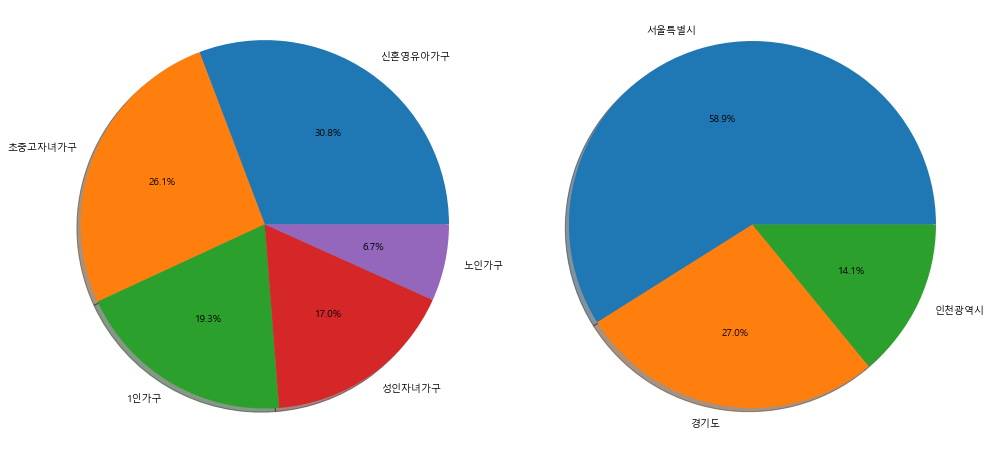

In [72]:
category_list = ['가구생애주기', '고객소재지_광역시도']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_2009[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

0    83.926202
1    16.073798
Name: 품목대분류코드, dtype: float64


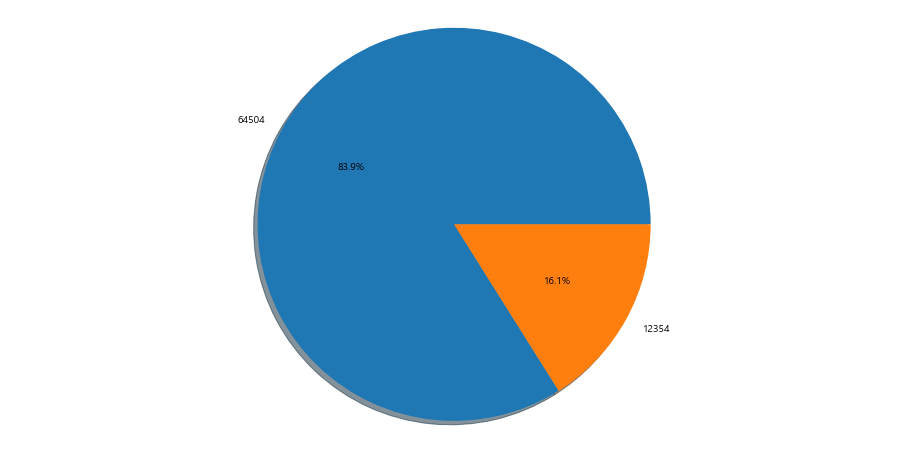

In [73]:
N = len(data_2009)
print(data_2009['품목대분류코드'].value_counts()/N*100)
fig, ax = plt.subplots(figsize = (16, 8))
labels = data_2009['품목대분류코드'].value_counts().unique()
size = data_2009['품목대분류코드'].value_counts()/N*100
ax.pie(size, labels= labels, autopct= '%1.1f%%', shadow=True)
ax.axis('equal')
plt.show() 

In [74]:
columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data_2009)

In [75]:
data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
data_dummies = get_preprocessed_df(data_dummies, '건당 매출금액')

In [76]:
warnings.filterwarnings('ignore')

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

xgb_clf = XGBClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

clf_list = [xgb_clf, rf_clf, gb_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

[19:42:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[17300  2052]
 [ 1907  1799]]
정확도 : 0.8283, 정밀도 : 0.4672, 재현율 : 0.4854, F1 : 0.4761, AUC : 0.7877
오차 행렬
[[15834  3518]
 [ 1797  1909]]
정확도 : 0.7695, 정밀도 : 0.3518, 재현율 : 0.5151, F1 : 0.4180, AUC : 0.7490
오차 행렬
[[15123  4229]
 [ 1218  2488]]
정확도 : 0.7638, 정밀도 : 0.3704, 재현율 : 0.6713, F1 : 0.4774, AUC : 0.7992


### 21년 3월 분류

In [77]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data['건당 매출금액'] = data['매출금액']/data['매출건수']
data = data.drop(['품목대분류명', '품목중분류명', '품목중분류코드', '고객소재지_읍면동'], axis= 1)
data_2103 = data[data['기준년월'] == 202103]
data_2103.head()

,기준년월,품목대분류코드,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액
390088,202103,16,여성,40대,신혼영유아가구,경기도,수원시,115442,9,12826.888889
390089,202103,11,여성,50대,성인자녀가구,서울특별시,구로구,318490,7,45498.571429
390090,202103,11,여성,50대,성인자녀가구,서울특별시,강동구,1469083,19,77320.157895
390091,202103,20,남성,30대,1인가구,서울특별시,강동구,1042413,30,34747.100000
390092,202103,20,남성,40대,초중고자녀가구,서울특별시,강동구,140273,5,28054.600000


In [78]:
data_2103.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128725 entries, 390088 to 519296
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   기준년월        128725 non-null  int64  
 1   품목대분류코드     128725 non-null  int64  
 2   성별          128725 non-null  object 
 3   연령          128725 non-null  object 
 4   가구생애주기      128725 non-null  object 
 5   고객소재지_광역시도  128725 non-null  object 
 6   고객소재지_시군구   128725 non-null  object 
 7   매출금액        128725 non-null  int64  
 8   매출건수        128725 non-null  int64  
 9   건당 매출금액     128725 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 10.8+ MB


In [79]:
data_2103.describe()

,기준년월,품목대분류코드,매출금액,매출건수,건당 매출금액
count,128725.0,128725.000000,1.287250e+05,128725.000000,1.287250e+05
mean,202103.0,18.577262,2.106455e+06,47.609043,5.600833e+04
std,0.0,14.252665,6.546384e+06,173.771072,6.721195e+04
min,202103.0,10.000000,2.578000e+03,5.000000,5.156000e+02
25%,202103.0,13.000000,3.231930e+05,9.000000,2.796623e+04
50%,202103.0,17.000000,7.097690e+05,16.000000,4.028100e+04
75%,202103.0,20.000000,1.745899e+06,35.000000,6.204257e+04
max,202103.0,99.000000,3.600458e+08,10478.000000,4.738275e+06


In [80]:
data_2103 = get_encoding(data_2103, '품목대분류코드', 21)
data_2103.head()

,기준년월,성별,연령,가구생애주기,고객소재지_광역시도,고객소재지_시군구,매출금액,매출건수,건당 매출금액,품목대분류코드
390088,202103,여성,40대,신혼영유아가구,경기도,수원시,115442,9,12826.888889,0
390089,202103,여성,50대,성인자녀가구,서울특별시,구로구,318490,7,45498.571429,0
390090,202103,여성,50대,성인자녀가구,서울특별시,강동구,1469083,19,77320.157895,0
390091,202103,남성,30대,1인가구,서울특별시,강동구,1042413,30,34747.100000,0
390092,202103,남성,40대,초중고자녀가구,서울특별시,강동구,140273,5,28054.600000,0


여성    55.511217
남성    44.488783
Name: 성별, dtype: float64
30대       28.515962
40대       28.381148
20대       18.415660
50대       13.923641
60대 이상     6.390207
20세 미만     4.373382
Name: 연령, dtype: float64


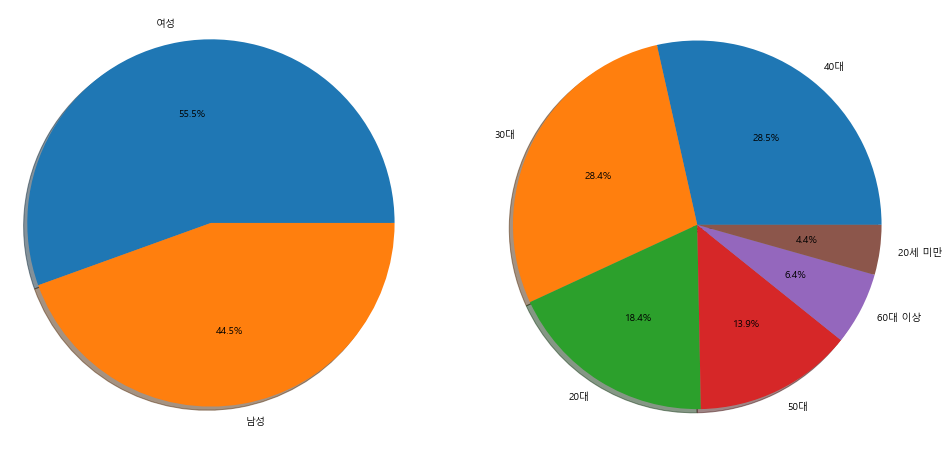

In [81]:
data_f = data_2103[data_2103['품목대분류코드'] == 1]

N = len(data_f)

category_list = ['성별', '연령']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_2103[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

신혼영유아가구    30.322476
1인가구       29.260138
초중고자녀가구    19.483391
성인자녀가구     14.543788
노인가구        6.390207
Name: 가구생애주기, dtype: float64
서울특별시    58.380069
경기도      27.642364
인천광역시    13.977567
Name: 고객소재지_광역시도, dtype: float64


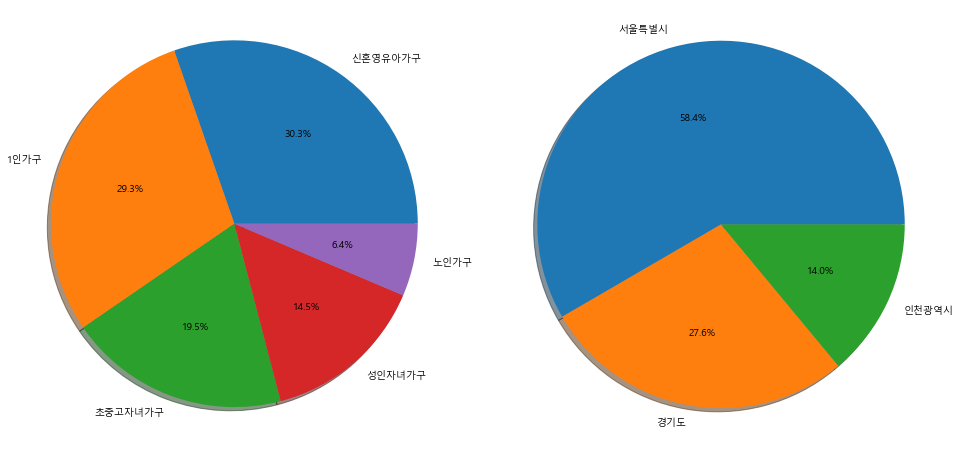

In [82]:
category_list = ['가구생애주기', '고객소재지_광역시도']
fig, ax = plt.subplots(figsize = (16,8), ncols = len(category_list))
for i, category in enumerate(category_list):
    print(data_f[category].value_counts()/N*100)
    labels = data_2103[category].value_counts().index
    size = data_f[category].value_counts()/N*100
    ax[i].pie(size, labels = labels, autopct='%1.1f%%', shadow=True)
    ax[i].axis('equal')
plt.show()

0    85.594096
1    14.405904
Name: 품목대분류코드, dtype: float64


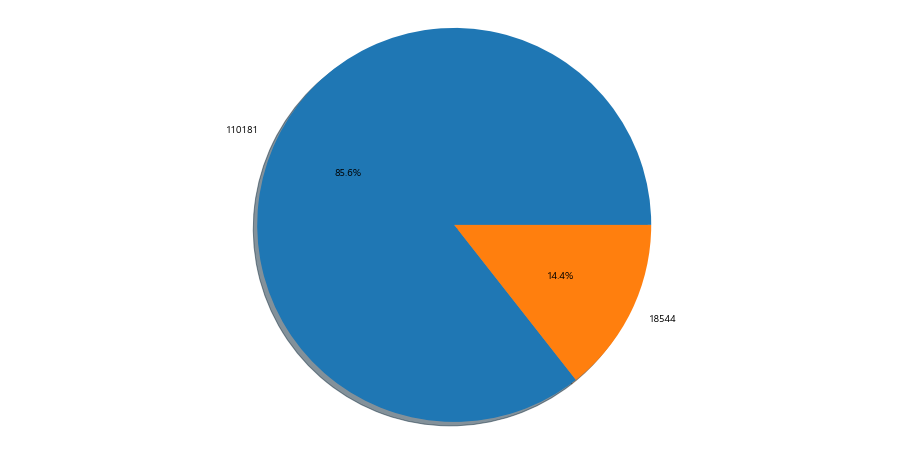

In [83]:
N = len(data_2103)
print(data_2103['품목대분류코드'].value_counts()/N*100)
fig, ax = plt.subplots(figsize = (16, 8))
labels = data_2103['품목대분류코드'].value_counts().unique()
size = data_2103['품목대분류코드'].value_counts()/N*100
ax.pie(size, labels= labels, autopct= '%1.1f%%', shadow=True)
ax.axis('equal')
plt.show() 

In [84]:
columns = ['성별', '연령', '가구생애주기', '고객소재지_광역시도', '고객소재지_시군구']

for col in columns:
    data_dummies = get_dummies(col, data_2103)

In [85]:
data_dummies = get_preprocessed_df(data_dummies, '매출금액')
data_dummies = get_preprocessed_df(data_dummies, '매출건수')
data_dummies = get_preprocessed_df(data_dummies, '건당 매출금액')

In [86]:
warnings.filterwarnings('ignore')

y_target = data_dummies['품목대분류코드']
X_features = data_dummies.drop(['품목대분류코드'], axis =1)

xgb_clf = XGBClassifier()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size= 0.3, stratify=y_target)

smote = SMOTE()
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

clf_list = [xgb_clf, rf_clf, gb_clf]

for clf in clf_list:
    get_model_train_eval(clf, ftr_train= X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test = y_test)

[19:44:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[29237  3818]
 [ 2397  3166]]
정확도 : 0.8391, 정밀도 : 0.4533, 재현율 : 0.5691, F1 : 0.5047, AUC : 0.8179
오차 행렬
[[27480  5575]
 [ 2581  2982]]
정확도 : 0.7888, 정밀도 : 0.3485, 재현율 : 0.5360, F1 : 0.4224, AUC : 0.7692
오차 행렬
[[26214  6841]
 [ 1623  3940]]
정확도 : 0.7808, 정밀도 : 0.3655, 재현율 : 0.7083, F1 : 0.4821, AUC : 0.8247


In [87]:
df2 = pd.read_excel('C:/Users/user/Desktop/경진대회/소비평가지수.xlsx')
Timeindex = pd.date_range('2019.03', periods=len(df2), freq='M')
df2.set_index(Timeindex, inplace=True)
df2.drop('일자', axis = 1,inplace=True)
df2.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,온라인쇼핑몰 e상품서비스 (단위:백만원),온라인쇼핑몰 식품 (단위:백만원),온라인쇼핑몰 전자 (단위:백만원),온라인쇼핑몰 여가스포츠 (단위:백만원),경제심리지수(원계열),경제심리지수(순환변동치),...,02 주류 및 담배,03 의류 및 신발,04 주택 ·수도 · 전기 및 연료,05 가정용품 및 가사 서비스,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
2019-03-31,100.5,NaN,NaN,0.2,2586885,2000184,1857380,1887506,96.6,95.2,...,102.26,104.10,103.01,107.58,99.30,97.25,101.70,105.19,109.63,108.38
2019-04-30,102.4,NaN,NaN,0.7,2587805,2031463,1603396,1956177,97.6,95.1,...,102.66,103.82,102.76,108.06,100.78,97.52,102.74,105.25,109.80,108.62
2019-05-31,98.7,NaN,NaN,0.7,2802641,2139279,1736273,2102796,94.3,95.1,...,103.12,103.92,102.84,106.95,103.06,97.32,102.32,105.34,110.01,109.00
2019-06-30,98.4,NaN,NaN,0.7,2854338,2084469,1566999,2095443,95.0,95.0,...,103.31,103.97,102.90,106.67,103.31,97.17,101.29,105.39,110.11,108.73
2019-07-31,96.9,NaN,NaN,0.5,3075567,2204550,1673541,2258515,92.2,94.8,...,103.33,103.98,101.47,107.65,102.58,96.76,102.81,105.39,110.35,108.81
2019-08-31,93.5,NaN,NaN,0.5,3268142,2454057,1646430,2250542,91.5,94.5,...,103.38,103.98,101.55,107.28,102.59,97.13,103.65,105.42,110.64,108.77
2019-09-30,97.9,NaN,NaN,0.5,2843301,2463193,1532039,1880731,94.1,93.8,...,103.60,104.02,103.18,106.53,102.99,97.40,102.54,103.58,110.09,108.77
2019-10-31,99.5,NaN,NaN,0.9,3030595,2417261,1645310,2100003,93.5,92.8,...,103.67,104.20,103.34,107.80,103.60,97.33,102.90,103.72,110.27,108.85
2019-11-30,101.7,NaN,NaN,0.9,3235373,2550984,1885360,2121624,94.3,91.1,...,103.40,104.80,103.33,106.96,103.12,96.57,101.20,103.77,110.29,108.92
2019-12-31,101.3,NaN,NaN,0.9,3388613,2617653,1768269,2164971,95.1,88.6,...,103.45,104.80,103.50,107.47,103.58,96.52,100.52,103.83,110.45,108.94


In [88]:
df2.fillna(0, inplace=True) #NaN값은 코로나 컬럼에만 있으므로 다 0으로 채워도 상관없음
df2.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,온라인쇼핑몰 e상품서비스 (단위:백만원),온라인쇼핑몰 식품 (단위:백만원),온라인쇼핑몰 전자 (단위:백만원),온라인쇼핑몰 여가스포츠 (단위:백만원),경제심리지수(원계열),경제심리지수(순환변동치),...,02 주류 및 담배,03 의류 및 신발,04 주택 ·수도 · 전기 및 연료,05 가정용품 및 가사 서비스,07 교통,08 통신,09 오락 및 문화,10 교육,11 음식 및 숙박,12 기타 상품 및 서비스
2019-03-31,100.5,0.0,0.0,0.2,2586885,2000184,1857380,1887506,96.6,95.2,...,102.26,104.10,103.01,107.58,99.30,97.25,101.70,105.19,109.63,108.38
2019-04-30,102.4,0.0,0.0,0.7,2587805,2031463,1603396,1956177,97.6,95.1,...,102.66,103.82,102.76,108.06,100.78,97.52,102.74,105.25,109.80,108.62
2019-05-31,98.7,0.0,0.0,0.7,2802641,2139279,1736273,2102796,94.3,95.1,...,103.12,103.92,102.84,106.95,103.06,97.32,102.32,105.34,110.01,109.00
2019-06-30,98.4,0.0,0.0,0.7,2854338,2084469,1566999,2095443,95.0,95.0,...,103.31,103.97,102.90,106.67,103.31,97.17,101.29,105.39,110.11,108.73
2019-07-31,96.9,0.0,0.0,0.5,3075567,2204550,1673541,2258515,92.2,94.8,...,103.33,103.98,101.47,107.65,102.58,96.76,102.81,105.39,110.35,108.81
2019-08-31,93.5,0.0,0.0,0.5,3268142,2454057,1646430,2250542,91.5,94.5,...,103.38,103.98,101.55,107.28,102.59,97.13,103.65,105.42,110.64,108.77
2019-09-30,97.9,0.0,0.0,0.5,2843301,2463193,1532039,1880731,94.1,93.8,...,103.60,104.02,103.18,106.53,102.99,97.40,102.54,103.58,110.09,108.77
2019-10-31,99.5,0.0,0.0,0.9,3030595,2417261,1645310,2100003,93.5,92.8,...,103.67,104.20,103.34,107.80,103.60,97.33,102.90,103.72,110.27,108.85
2019-11-30,101.7,0.0,0.0,0.9,3235373,2550984,1885360,2121624,94.3,91.1,...,103.40,104.80,103.33,106.96,103.12,96.57,101.20,103.77,110.29,108.92
2019-12-31,101.3,0.0,0.0,0.9,3388613,2617653,1768269,2164971,95.1,88.6,...,103.45,104.80,103.50,107.47,103.58,96.52,100.52,103.83,110.45,108.94


In [89]:
df2 = df2.iloc[:, [0, 1, 2, 3, 8, 9, 10]];df2.head(15)
df2.reset_index(inplace=True)

In [90]:
path = 'C:/Users/user/Desktop/경진대회/KRX 데이터/전종목 시세/'
file_list = os.listdir(path)
file_list_py = [file for file in file_list if file.endswith('.csv')]
file_list_py

df = pd.DataFrame()
Timeindex = pd.date_range('9/1/2018', periods= len(file_list_py), freq = 'M')
for i, time in zip(file_list_py,Timeindex):
    data = pd.read_csv(path + i, encoding= 'cp949')
    data_df = pd.DataFrame(data)
    data_df['기준년월'] = time
    df = pd.concat([df, data])
 
df_MC = df.reset_index(drop=True)

In [91]:
def get_category(category, df):
    category_df = df[df['종목명'] == category]
    category_df = category_df[['종목명','종가', '시가총액', '기준년월']]
    category_df.set_index('기준년월', inplace = True)
    return category_df

In [92]:
xlsx = pd.ExcelFile('C:/Users/user/Desktop/경진대회/관련종목.xlsx')
inv_category_F = pd.read_excel(xlsx, sheet_name = '식품')
category_list_F = inv_category_F['종목명'].tolist()

In [93]:
category_df_list = []
for i in range(len(category_list_F)):
     category_df_list.append(get_category(category_list_F[i], df_MC))

In [94]:
df = pd.DataFrame(index = Timeindex)
df.index.names = ['기준년월']

In [95]:
cri_9_1_df = pd.read_csv(r'C:\Users\user\Desktop\경진대회\KRX 데이터\18.09.03.csv', encoding='cp949')

In [96]:
def get_category_2(category, df):
    category_df = df[df['종목명'] == category]
    category_df = category_df[['종목명', '시가총액']]
    return category_df

In [97]:
df_list = []
for i in range(len(category_list_F)):
     if category_list_F[i] in cri_9_1_df['종목명'].tolist():
          df_list.append(get_category_2(category_list_F[i], cri_9_1_df))
     else: 
          pass

In [98]:
df_MC_list = []
for i in range(len(df_list)):
    df_MC_list.append(df_list[i]['시가총액'])

In [99]:
cri_MC_9_1 = np.array(df_MC_list).sum()

In [100]:
def get_category_3(df):
    df = df['시가총액']
    return df

In [101]:
MC_list = []
for i in range(len(category_df_list)):
    MC_list.append(get_category_3(category_df_list[i]))

In [102]:
from functools import reduce
df_merge = reduce(lambda left, right : pd.merge(left, right, on = '기준년월', how = 'outer'), MC_list)

In [103]:
df_merge.fillna(0, inplace= True)

In [104]:
df_merge  =df_merge/100000000

In [105]:
df_merge.columns = range(len(df_merge.columns))

In [106]:
alpha = []
list1 = []
for i in np.arange(1,35):
    if 0 in df_merge.iloc[i-1, :].tolist():
        A = df_merge.iloc[i, :].sum()
        zero_list = df_merge.iloc[i-1,:][df_merge.iloc[i-1, : ] == 0].index.tolist()
        for j in range(len(zero_list)):
            alpha.append(df_merge.iloc[i,zero_list[j]])
        alpha_sum = np.array(alpha).sum()
        list1.append(df_merge.iloc[i, :].sum()/(cri_MC_9_1 + alpha_sum/A))
    elif 0 not in df_merge.iloc[i-1, :].tolist():
        list1.append(df_merge.iloc[i, :].sum()/cri_MC_9_1)

In [107]:
list1.insert(0, df_merge.iloc[0, :].sum()/cri_MC_9_1)

In [108]:
df = pd.DataFrame(list1, index = Timeindex)
df.reset_index(inplace=True)
df.columns = ['index', '주가지수']
df

,index,주가지수
0,2018-09-30,1.026637e-08
1,2018-10-31,8.740130e-09
2,2018-11-30,9.558351e-09
3,2018-12-31,9.360772e-09
4,2019-01-31,9.967054e-09
5,2019-02-28,9.933799e-09
6,2019-03-31,1.028999e-08
7,2019-04-30,1.037902e-08
8,2019-05-31,9.440447e-09
9,2019-06-30,9.587350e-09


In [109]:
df_merge = pd.merge(df2, df, on = 'index', how = 'inner')
df_merge.set_index('index', inplace=True)
df_merge.head(15)

,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,주가지수
index,,,,,,,,
2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49,1.028999e-08
2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87,1.037902e-08
2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05,9.440447e-09
2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88,9.587350e-09
2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56,8.871834e-09
2019-08-31,93.5,0.0,0.0,0.5,91.5,94.5,104.81,8.427215e-09
2019-09-30,97.9,0.0,0.0,0.5,94.1,93.8,105.20,9.040034e-09
2019-10-31,99.5,0.0,0.0,0.9,93.5,92.8,105.46,8.910696e-09
2019-11-30,101.7,0.0,0.0,0.9,94.3,91.1,104.87,8.900058e-09


In [159]:
data = pd.read_csv(r'C:\Users\user\Desktop\경진대회\금융보안원_경진대회_데이터(최종제출).csv')
data_f = data[data['품목대분류명'] == 'e상품/서비스']
grouped_M = pd.DataFrame(data_f['매출금액'].groupby(data_f['기준년월']).sum())
grouped_C = pd.DataFrame(data_f['매출건수'].groupby(data_f['기준년월']).sum())
df_f = pd.merge(grouped_M, grouped_C, on = '기준년월')
rng = pd.date_range('2019.03', periods=5, freq='6M')
df_f.set_index(rng, inplace= True)
df_f

,매출금액,매출건수
2019-03-31,70203016159,1884001
2019-09-30,72558768943,1876005
2020-03-31,94641594663,2610928
2020-09-30,100350879131,2598550
2021-03-31,116421252063,3139815


In [250]:
def get_random_var(data, column):
    data_list = data[column].tolist()
    num_list = []
    for i in range(len(data_list)-1):
        A = data_list[i]
        B = data_list[i+1]
        num_list.append(A)
        for _ in range(5):
            n = random.randint(min(A,B), max(A,B))
            num_list.append(n)
        num_list.append(B)
    return set(num_list)

In [251]:
def get_random_df(data, column):
    num_list = get_random_var(data, column)
    time_index = pd.date_range('2019.03', periods= len(num_list), freq= 'M')
    df = pd.DataFrame(num_list, index = time_index)
    df.columns = [column]
    df.reset_index(inplace =True)
    return df

In [252]:
df_M = get_random_df(df_f, '매출금액')
df_C = get_random_df(df_f, '매출건수')

df_f_merge = pd.merge(df_M, df_C, on = 'index', how = 'outer')
df_f_merge.rename(columns= {'index' : '기준년월'}, inplace =True)
df_f_merge

,기준년월,매출금액,매출건수
0,2019-03-31,109232426504,1876097
1,2019-04-30,96926863891,3002881
2,2019-05-31,100350879131,2652676
3,2019-06-30,101337663139,2601364
4,2019-07-31,70299868708,2598550
5,2019-08-31,71965925029,2598559
6,2019-09-30,113108179492,1876005
7,2019-10-31,94641594663,2607916
8,2019-11-30,72188859945,1972270
9,2019-12-31,72558768943,2970414


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '2019-03-31T00:00:00.000000000'),
  Text(1, 0, '2019-04-30T00:00:00.000000000'),
  Text(2, 0, '2019-05-31T00:00:00.000000000'),
  Text(3, 0, '2019-06-30T00:00:00.000000000'),
  Text(4, 0, '2019-07-31T00:00:00.000000000'),
  Text(5, 0, '2019-08-31T00:00:00.000000000'),
  Text(6, 0, '2019-09-30T00:00:00.000000000'),
  Text(7, 0, '2019-10-31T00:00:00.000000000'),
  Text(8, 0, '2019-11-30T00:00:00.000000000'),
  Text(9, 0, '2019-12-31T00:00:00.000000000'),
  Text(10, 0, '2020-01-31T00:00:00.000000000'),
  Text(11, 0, '2020-02-29T00:00:00.000000000'),
  Text(12, 0, '2020-03-31T00:00:00.000000000'),
  Text(13, 0, '2020-04-30T00:00:00.000000000'),
  Text(14, 0, '2020-05-31T00:00:00.000000000'),
  Text(15, 0, '2020-06-30T00:00:00.000000000'),
  Text(16, 0, '2020-07-31T00:00:00.000000000'),
  Text(17, 0, '2020-08-31T00:00:00.000000000'),
  Text(18, 0, '2020-09-30T00

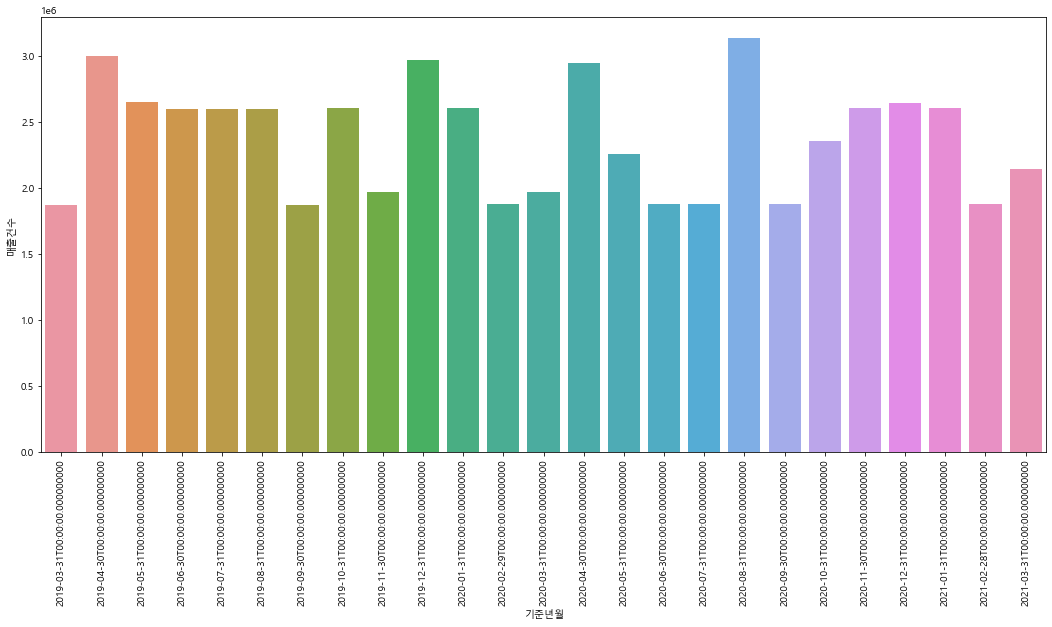

In [256]:
fig, ax = plt.subplots(figsize = (18, 8))
sns.barplot(x = '기준년월', y = '매출건수', data = df_f_merge)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '2019-03-31T00:00:00.000000000'),
  Text(1, 0, '2019-04-30T00:00:00.000000000'),
  Text(2, 0, '2019-05-31T00:00:00.000000000'),
  Text(3, 0, '2019-06-30T00:00:00.000000000'),
  Text(4, 0, '2019-07-31T00:00:00.000000000'),
  Text(5, 0, '2019-08-31T00:00:00.000000000'),
  Text(6, 0, '2019-09-30T00:00:00.000000000'),
  Text(7, 0, '2019-10-31T00:00:00.000000000'),
  Text(8, 0, '2019-11-30T00:00:00.000000000'),
  Text(9, 0, '2019-12-31T00:00:00.000000000'),
  Text(10, 0, '2020-01-31T00:00:00.000000000'),
  Text(11, 0, '2020-02-29T00:00:00.000000000'),
  Text(12, 0, '2020-03-31T00:00:00.000000000'),
  Text(13, 0, '2020-04-30T00:00:00.000000000'),
  Text(14, 0, '2020-05-31T00:00:00.000000000'),
  Text(15, 0, '2020-06-30T00:00:00.000000000'),
  Text(16, 0, '2020-07-31T00:00:00.000000000'),
  Text(17, 0, '2020-08-31T00:00:00.000000000'),
  Text(18, 0, '2020-09-30T00

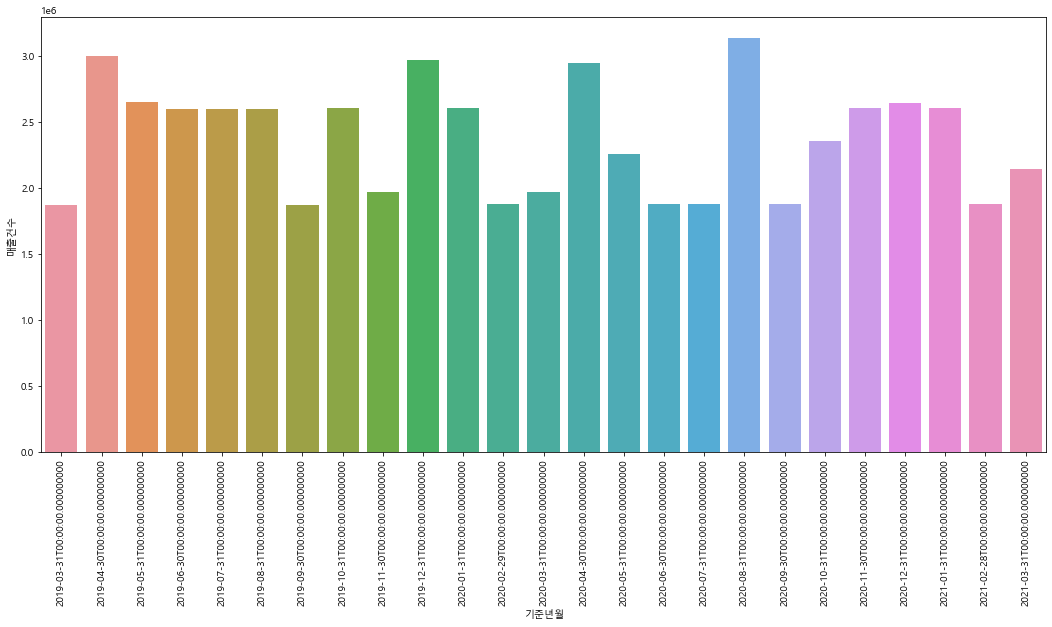

In [257]:
fig, ax = plt.subplots(figsize = (18, 8))
sns.barplot(x = '기준년월', y = '매출건수', data = df_f_merge)
plt.xticks(rotation = 90)

In [258]:
df_merge.reset_index(inplace=True)
df_merge.rename(columns= {'index' :'기준년월'}, inplace = True)
df_merge = pd.merge(df_merge, df_f_merge, on = '기준년월', how = 'outer')
df_merge.head()

,기준년월,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,주가지수,매출금액,매출건수
0,2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49,1.028999e-08,1.092324e+11,1876097.0
1,2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87,1.037902e-08,9.692686e+10,3002881.0
2,2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05,9.440447e-09,1.003509e+11,2652676.0
3,2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88,9.587350e-09,1.013377e+11,2601364.0
4,2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56,8.871834e-09,7.029987e+10,2598550.0


In [259]:
df_merge.tail()

,기준년월,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,주가지수,매출금액,매출건수
23,2021-02-28,97.4,11467.0,183.0,1.2,96.6,96.2,107.00,1.056177e-08,9.564580e+10,1878264.0
24,2021-03-31,100.5,13415.0,128.0,1.2,101.3,98.9,107.16,1.091501e-08,7.045050e+10,2144634.0
25,2021-04-30,102.2,18927.0,97.0,3.5,105.3,101.6,107.39,1.116771e-08,NaN,NaN
26,2021-05-31,105.3,18331.0,131.0,3.5,105.4,104.1,107.46,1.196506e-08,NaN,NaN
27,2021-06-30,110.3,16623.0,59.0,3.5,109.3,106.6,107.39,1.243171e-08,NaN,NaN


In [260]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   기준년월            28 non-null     datetime64[ns]
 1   소비자심리지수         28 non-null     float64       
 2   코로나 확진자 수 (총합)  28 non-null     float64       
 3   사망자수            28 non-null     float64       
 4   민감소비등락률         28 non-null     float64       
 5   경제심리지수(원계열)     28 non-null     float64       
 6   경제심리지수(순환변동치)   28 non-null     float64       
 7   소비자물가지수         28 non-null     float64       
 8   주가지수            28 non-null     float64       
 9   매출금액            25 non-null     float64       
 10  매출건수            25 non-null     float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 3.7 KB


In [262]:
mean = df_merge['매출금액'].mean()
df_merge['매출금액'].fillna(mean, inplace = True)
df_merge

,기준년월,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,주가지수,매출금액,매출건수
0,2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49,1.028999e-08,1.092324e+11,1876097.0
1,2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87,1.037902e-08,9.692686e+10,3002881.0
2,2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05,9.440447e-09,1.003509e+11,2652676.0
3,2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88,9.587350e-09,1.013377e+11,2601364.0
4,2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56,8.871834e-09,7.029987e+10,2598550.0
5,2019-08-31,93.5,0.0,0.0,0.5,91.5,94.5,104.81,8.427215e-09,7.196593e+10,2598559.0
6,2019-09-30,97.9,0.0,0.0,0.5,94.1,93.8,105.20,9.040034e-09,1.131082e+11,1876005.0
7,2019-10-31,99.5,0.0,0.0,0.9,93.5,92.8,105.46,8.910696e-09,9.464159e+10,2607916.0
8,2019-11-30,101.7,0.0,0.0,0.9,94.3,91.1,104.87,8.900058e-09,7.218886e+10,1972270.0
9,2019-12-31,101.3,0.0,0.0,0.9,95.1,88.6,105.12,9.043148e-09,7.255877e+10,2970414.0


In [263]:
mean = df_merge['매출건수'].mean()
df_merge['매출건수'].fillna(mean, inplace = True)
df_merge

,기준년월,소비자심리지수,코로나 확진자 수 (총합),사망자수,민감소비등락률,경제심리지수(원계열),경제심리지수(순환변동치),소비자물가지수,주가지수,매출금액,매출건수
0,2019-03-31,100.5,0.0,0.0,0.2,96.6,95.2,104.49,1.028999e-08,1.092324e+11,1876097.00
1,2019-04-30,102.4,0.0,0.0,0.7,97.6,95.1,104.87,1.037902e-08,9.692686e+10,3002881.00
2,2019-05-31,98.7,0.0,0.0,0.7,94.3,95.1,105.05,9.440447e-09,1.003509e+11,2652676.00
3,2019-06-30,98.4,0.0,0.0,0.7,95.0,95.0,104.88,9.587350e-09,1.013377e+11,2601364.00
4,2019-07-31,96.9,0.0,0.0,0.5,92.2,94.8,104.56,8.871834e-09,7.029987e+10,2598550.00
5,2019-08-31,93.5,0.0,0.0,0.5,91.5,94.5,104.81,8.427215e-09,7.196593e+10,2598559.00
6,2019-09-30,97.9,0.0,0.0,0.5,94.1,93.8,105.20,9.040034e-09,1.131082e+11,1876005.00
7,2019-10-31,99.5,0.0,0.0,0.9,93.5,92.8,105.46,8.910696e-09,9.464159e+10,2607916.00
8,2019-11-30,101.7,0.0,0.0,0.9,94.3,91.1,104.87,8.900058e-09,7.218886e+10,1972270.00
9,2019-12-31,101.3,0.0,0.0,0.9,95.1,88.6,105.12,9.043148e-09,7.255877e+10,2970414.00


<AxesSubplot:>

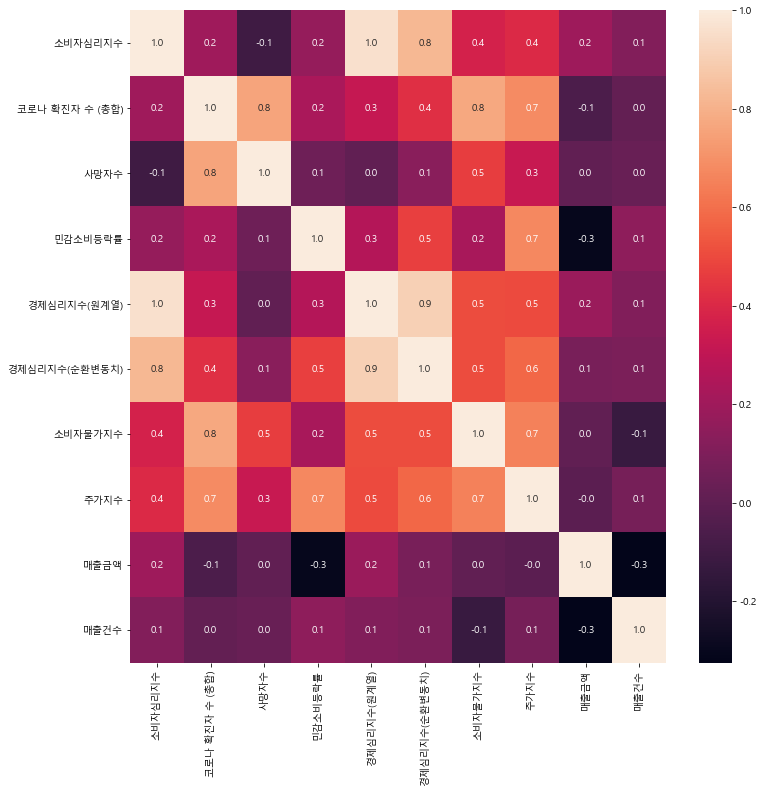

In [264]:
fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df_merge.corr(), annot=True, fmt = '.1f', ax = ax)

In [ ]:
def get_category_df(data, category1, category2):
    data_WOMEN = data[data[category1] == category2]
    grouped = pd.DataFrame(data_WOMEN[category1].groupby(data_WOMEN['기준년월']).value_counts())
    grouped.columns = ['count']
    grouped.reset_index(inplace=True)
    timeindex_grouped = pd.date_range('2019.03', periods=5, freq= '6M')
    df = pd.DataFrame(grouped['count'])
    df.set_index(timeindex_grouped, inplace=True)
    df.rename({'count' : str(grouped[category1].unique())}, axis= 1, inplace=True)
    df_upsample = df.resample('M').mean()
    df_upsample =df_upsample.interpolate(method='values')
    df_upsample =df_upsample.reset_index().rename(columns={"index":"기준년월"})
    df_upsample.set_index('기준년월', inplace = True)
    return df_upsample